# Проект: Исследование стартапов

## Введение

### Цели и задачи проекта

**Цель:** подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Задачи:**

1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
- выяснить по каким столбцам можно объединять данные из разных таблиц;
- проверить можно ли доверять данным о сотрудниках стартапов и их образовании;
- исследовать аномальные покупки и выяснить, что означают покупки за 0 или за 1 доллар;
- изучить зависимость цены(price_amount) от категории **стартапов**(category code) и количества раундов финансирования(investment rounds) перед его покупкой;
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Названия файлов:

* `acquisition.csv` - cодержит информацию о покупках одними компаниями других компаний
* `company_and_rounds.csv` - cодержит информацию о компаниях и раундах финансирования
* `people.csv` - содержит информацию о сотрудниках
* `education.csv` - содержит информацию об образовании сотрудника
* `degrees.csv` - содержит информацию о типе образования сотрудника

Опциональные датасеты:

* `fund.csv` - содержит информацию о фондах
* `investment.csv` - содержит информацию о раундах инвестирования


**Описание датасета `acquisition.csv`:**

- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

**Описание датасета `company_and_rounds.csv`:**

- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

**Описание датасета `people.csv`:**

- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

**Описание датасета `education.csv`:**

- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

**Описание датасета `degrees.csv`:**

- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.


## Знакомство с данными: загрузка и первичная предобработка


###  Вывод общей информации, исправление названия столбцов


In [1]:
# Импортируем библиотеки
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Сохраняем файлы в датафреймы
base_url = "https://code.s3.yandex.net/datasets/"

acquisition_df = pd.read_csv(base_url + 'acquisition.csv')

company_and_rounds_df = pd.read_csv(base_url + 'company_and_rounds.csv')

people_df = pd.read_csv(base_url + 'people.csv')

education_df = pd.read_csv(base_url + 'education.csv')

degrees_df = pd.read_csv(base_url + 'degrees.csv')


In [3]:
# acquisition_df
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [4]:
acquisition_df.head(10)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01
5,11,227,228,NaN,7140000,2003-08-05
6,12,5,230,cash,0,2007-07-01
7,14,318,314,cash,0,2006-10-01
8,15,20,333,stock,1500000000,2002-07-08
9,16,342,341,cash,350000000,2007-08-01


### Промежуточный вывод по датасету `acquisition_df`

Датасет  `acquisition_df` содержит 6 столбцов и 9407 строк

- Названия столбцов на первый взгляд не требуют предобработки
- Пропуски содержатся в столбцах `term_code` и `acquired_at`
- Столбец `acquired_at` содержит дату сделки - следует привести к datetime
- Значения в столбцах соответствуют своему описанию

---

In [5]:
# company_and_rounds_df
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [6]:
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Промежуточный вывод по датасету `company_and_rounds_df`

Датасет  `company_and_rounds_df` содержит 22 столбца и 217774 строк

- Названия столбцов необходимо привести в формат snake_case
- Пропуски содержатся в столбцах `category  code` , `founded  at`, `closed  at` , `domain`, `network  username` , `country  code`, `funding  round  id` , `company  id`, `funded  at` , `funding  round  type`, `raised  amount` , `pre  money  valuation`, `participants`, `is  first  round`, `is  last  round`
- Все числовые столбцы, представленные в формате float64, поссле предобработки пропусков стоит привести к формату int64.
- Столбцы `founded at`, `closed at` и `funded  at` содержат информацию о дате - следует привести к datetime 
- Значения в столбцах соответствуют своему описанию
- Столбцы `company ID` и `company id` - дубли, которые стоит или объединить, или удалить  `company id`, так как в нём содержатся пропуски, в отличие от `company ID`

---

In [7]:
# people_df 
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [8]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


### Промежуточный вывод по датасету `people_df`

Датасет  `people_df` содержит 5 столбцов и 226709 строк

- Названия столбцов на первый взгляд не требуют предобработки
- Пропуски содержатся в столбцах `first_name`, `last_name`, `company_id` и `network_username`
- Столбец `company_id` поссле предобработки пропусков стоит привести к формату int64.
- Значения в столбцах соответствуют своему описанию

---

In [9]:
# education_df 
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [10]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


### Промежуточный вывод по датасету `education_df`

Датасет  `education_df` содержит 4 столбца и 109610 строк

- Названия столбцов на первый взгляд не требуют предобработки
- Пропуски содержатся в столбцах `instituition` и `graduated_at`
- Столбец `graduated_at` содержит дату получения образования - следует привести к datetime
- Значения в столбцах соответствуют своему описанию

---

In [11]:
# degrees_df
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [12]:
degrees_df.head(10)

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"
5,6,p:1017,BS,Computer Science
6,7,p:6176,BS,Computer Science
7,8,p:5412,MS,Politics
8,9,p:1243,BA,International Business & Marketing
9,10,p:6265,BS,Economics


### Промежуточный вывод по датасету `degrees_df`

Датасет  `degrees_df` содержит 4 столбца и 109610 строк

- Названия столбцов на первый взгляд не требуют предобработки
- Пропуски содержатся в столбцах `degree_type` и `subject`
- Из данных столбца `object_id` следует удалить приписку `p.` и привести столбец к формату int64
- Значения в столбцах соответствуют своему описанию

### Промежуточный вывод по содержанию датасетов

- Во всех датафреймах замечено большое количество пропусков, необходимо их обработать.
- После предобработки пропусков следует изменить типы данных в некоторых столбцах на подходящие.
- В некоторых датафреймах необходимо привести названия столбцов в формат snake_case, чтобы с ними было удобнее работать в дальнейшем.
- Во всех датафреймах столбец id означает разное (покупка, компания, человек, образование и т. д.). Их следует переименовать для более удобной работы в дальнейшем.
- Следует исследовать по каким столбцам соединяются таблицы и привести их к оиднаковым названиям.

### Изменение названий столбцов 

In [13]:
# Удаляем столбец-дубликат
company_and_rounds_df.drop(columns='company  id', axis=1, inplace=True)

In [14]:
new_columns = {}
for column in company_and_rounds_df:
    new_column = column.lower().replace('  ', '_')
    new_columns[column] = new_column

company_and_rounds_df = company_and_rounds_df.rename(columns = new_columns)
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  funded_at            52680 non-null   object 
 15  funding_round_typ

---

In [15]:
acquisition_df = acquisition_df.rename(columns = {'id': 'acquisition_id'})
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   acquisition_id        9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


---

In [16]:
people_df = people_df.rename(columns = {'id': 'person_id'})
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   person_id         226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


---

In [17]:
education_df = education_df.rename(columns = {'id': 'education_id'})
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   education_id  109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


---

In [18]:
degrees_df = degrees_df.rename(columns = {'id': 'education_id',
                                           'object_id' : 'person_id'
                                         })
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   education_id  109610 non-null  int64 
 1   person_id     109610 non-null  object
 2   degree_type   98392 non-null   object
 3   subject       81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


### Промежуточный вывод по изменению названий столбцов

В датасете **company_and_rounds_df**:

- Из датафрейма был удален столбец-дубль `company  id`
- Все столбцы приведены к формату snake_case

Во всех датасетах столбцы `id` получили уникальные названия, для более удобной работы в дальнейшем

В датасете **degrees_df** столбец `object_id` переименован в `person_id`

### Смена типов и анализ пропусков

- Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

#### Меняем в типы данных столбцах, которые хранят значения даты и времени

In [19]:
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'])
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   acquisition_id        9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [20]:
company_and_rounds_df['founded_at'] = pd.to_datetime(company_and_rounds_df['founded_at'])
company_and_rounds_df['closed_at'] = pd.to_datetime(company_and_rounds_df['closed_at'])
company_and_rounds_df['funded_at'] = pd.to_datetime(company_and_rounds_df['funded_at'])
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [21]:
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'])
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   education_id  109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


#### Работа с пропусками

Пропуски в `acquisition_df`

In [22]:
abs_omissions_acquisition = acquisition_df.isna().sum()
otn_omissions_acquisition = round(acquisition_df.isna().sum() / acquisition_df.shape[0] * 100, 2)
omissions_acquisition_df = pd.DataFrame({
                                         'Абсолютные значения': abs_omissions_acquisition,
                                         'Относительные значения (%)': otn_omissions_acquisition
                                        })
omissions_acquisition_df

,Абсолютные значения,Относительные значения (%)
acquisition_id,0,0.00
acquiring_company_id,0,0.00
acquired_company_id,0,0.00
term_code,7576,80.54
price_amount,0,0.00
acquired_at,29,0.31


В столбце acquired_at 29 пропусков(0.31%) 

Возможными причинами данных пропусков может стать:
- Опечатки при вводе даты.
- Сделки, где дата не была задокументирована.

Так как процент пропусков меньше 0.5, то их можно удалить и это не повлияет на репрезентативность данных (0.3% — незначительное количество).

В столбце term_code	7576 пропусков(80.54%)

Возможные причины пропусков:

- Сделки без указанных условий оплаты.
- Данные не собирались для ранних сделок.

Так как количество пропусков значительно, то оставим столбец без изменений. Если в дальнейшем он понадобится для анализа, то заменим пропуски на заглушку.

In [23]:
# Удаляем пропуски в acquired_at
acquisition_df.dropna(subset=['acquired_at'], inplace = True)
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9378 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   acquisition_id        9378 non-null   int64         
 1   acquiring_company_id  9378 non-null   int64         
 2   acquired_company_id   9378 non-null   int64         
 3   term_code             1826 non-null   object        
 4   price_amount          9378 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 512.9+ KB


---

Пропуски в `company_and_rounds_df`

In [24]:
abs_omissions_company_and_rounds = company_and_rounds_df.isna().sum()
otn_omissions_company_and_rounds = round(company_and_rounds_df.isna().sum() / company_and_rounds_df.shape[0] * 100, 2)
omissions_company_and_rounds_df = pd.DataFrame({
                                         'Абсолютные значения': abs_omissions_company_and_rounds,
                                         'Относительные значения (%)': otn_omissions_company_and_rounds
                                        })
omissions_company_and_rounds_df 

,Абсолютные значения,Относительные значения (%)
company_id,302,0.14
name,302,0.14
category_code,73888,33.93
status,302,0.14
founded_at,107818,49.51
closed_at,214325,98.42
domain,70615,32.43
network_username,122240,56.13
country_code,109167,50.13
investment_rounds,302,0.14


Каждый столбец данного датасета содержит пропуски

1. **Малое количество пропусков(<1%)**

В столбцах company_id, name, status, investment_rounds, funding_rounds, funding_total, milestones содержатся по 302 пропуска(0.14%). Одинаковое значение пропусков в каждом столбце может быть связано с тем, что пропуски находятся в одних и тех же строках. В дальнейшем, если не получится восстановить эти пропуски, то их можно удалить, так как данное количество пропусков является малым и не повлияет на репрезентативность данных, если их удалить.

2. **Умеренное количество пропусков (1-50%)**

- category_code (33.93%) 
- founded_at (49.51%)
- domain (32.43%)
- country_code (50.13%)

***Возможные причины:***

- Данные собирались не для всех компаний
- Некоторые компании не имеют четкой категории/домена
- Некоторые компании не получают инвестиции, следовательно для них нет даты инвестировании

***Возможные решения:***

- Оставить столбцы без изменений, если они не пригодятся для дальнейшего анализа
- Для category_code и country_code: заполнить значением-индикатором "unknown"
- Для founded_at: удалить строки или заполнить медианной датой
- Для domain: заполнить значением-индикатором "unknown"

3. **Критичные пропуски (>50%)**

- closed_at (98.42%)
- network_username (56.13%)

- Все столбцы, связанные с раундами финансирования примерно 75% пропусков:
    - funding_round_id
    - funded_at
    - funding_round_type
    - raised_amount
    - pre_money_valuation
    - participants
    - is_first_round
    - is_last_round

***Возможные причины:***

closed_at: почти все компании активны (что логично для стартапов).

network_username: некоторые компании ещё не создали аккаунт в сети.

Данные по финансированию отсутствуют у большинства компаний (возможно, нет открытых данных).

***Возможные решения:***

 - Для closed_at: заменить пропуски на значение-индикатром, чтобы можно было анализировать данные в разрезе закрытых и незакрытых компаний.

- Для данных о финансировании: можно создать столбец с бинарным признаком has_funding: 

    1 - у компании есть данные о финансировании;

    0 — нет данных о финансировании.

- network_username (56% пропусков):

    Если соцсети не важны для анализа — удалить столбец.

    Если важны — заменить пропуски на значение-индикатор.

---

Пропуски в `people_df`

In [25]:
abs_omissions_people = people_df.isna().sum()
otn_omissions_people = round(people_df.isna().sum() / people_df.shape[0] * 100, 2)
omissions_people_df = pd.DataFrame({
                                    'Абсолютные значения': abs_omissions_people,
                                    'Относительные значения (%)': otn_omissions_people
                                    })
omissions_people_df

,Абсолютные значения,Относительные значения (%)
person_id,0,0.00
first_name,5,0.00
last_name,1,0.00
company_id,192094,84.73
network_username,187842,82.86


Незначительное количество пропусков обнаружено в столбцах first_name(5) и last_name(1), это может быть связано с тем, что у некоторых людей нет имени или фамилии(особенность страны или культуры), стоит проверить нет ли людей с пропусками сразу в обоих этих столбцах.

Большое количество пропусков содержится в столбцах company_id и network_username - 84.73% и 82.86% соответственно.

Пропуски в этих столбцах могут быть обусловлены тем, что при сборе данных они были не обязательными для заполнения. Также пропуски в столбце company_id могут быть связаны с тем, что некоторые люди являются независимыми специалистами.

Так как количество пропусков в этих столбцах значительно, то в столбце company_id заменим их на заглушку, чтобы привести данные в этом столбце к более подходящему формату формату: int64, а столбец network_username оставим без изменений. Если в дальнейшем он понадобится для анализа, то заменим пропуски на заглушку.

In [26]:
people_df[(people_df['first_name'].isna() == 1) & (people_df['last_name'].isna() == 1)]

,person_id,first_name,last_name,company_id,network_username
207997,78517,NaN,NaN,29.0,NaN


Найдена строка, где у человека нет ни имени, ни фамилии. Удалим её.

In [27]:
people_df.dropna(subset=['last_name'], inplace=True) # Удаляем строку с пропущенным именем и фамилией

# Заменяем пропуски в company_id на -1
people_df['company_id'] = people_df['company_id'].fillna(-1)

# Меняем тип данных в company_id на int64
people_df['company_id'] = people_df['company_id'].astype('int64')

people_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 226708 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   person_id         226708 non-null  int64 
 1   first_name        226704 non-null  object
 2   last_name         226708 non-null  object
 3   company_id        226708 non-null  int64 
 4   network_username  38867 non-null   object
dtypes: int64(2), object(3)
memory usage: 10.4+ MB


---

Пропуски в `education_df`

In [28]:
abs_omissions_education = education_df.isna().sum()
otn_omissions_education = round(education_df.isna().sum() / education_df.shape[0] * 100, 2)
omissions_education_df = pd.DataFrame({
                                    'Абсолютные значения': abs_omissions_education,
                                    'Относительные значения (%)': otn_omissions_education
                                    })
omissions_education_df

,Абсолютные значения,Относительные значения (%)
education_id,0,0.00
person_id,0,0.00
instituition,55,0.05
graduated_at,51556,47.04


Найдено 55 пропусков(0.05%) в столбце instituition. Пропуски в данном столбце могут быть связаны с тем, что некоторые работники не обучались в институте

В столбце graduated_at обнаружено 51556 пропусков(47.04%).

Возможные причины:

- у людей, которые не обучались в институте не будет и даты окончания обучения.
- Некоторые работники ещё не закончили обучение.

Оставим столбцы без изменений. Если в дальнейшем он понадобится для анализа, то заменим пропуски на заглушку.

---

In [29]:
abs_omissions_degrees = degrees_df.isna().sum()
otn_omissions_degrees = round(degrees_df.isna().sum() / degrees_df.shape[0] * 100, 2)
omissions_degrees_df = pd.DataFrame({
                                    'Абсолютные значения': abs_omissions_degrees,
                                    'Относительные значения (%)': otn_omissions_degrees
                                    })
omissions_degrees_df

,Абсолютные значения,Относительные значения (%)
education_id,0,0.00
person_id,0,0.00
degree_type,11218,10.23
subject,28312,25.83


Обнаружено 11218 пропусков(10.23%) в столбце degree_type. 

Возможные причины пропусков:

- Данные могли быть утеряны при переносе из старых систем.
- При сборе данных этот столбцех был необязательным для заполнения.
- Человек не указал степень (например, неоконченное образование).

В столбце subject обнаружено 28312 пропусков(25.83%).

Возможные причины:

- Для некоторых степеней нет специализации.
- Данные собирались не для всех типов образования (например, только для высшего).
- Человек не указал специальность.

Оставим столбцы без изменений. Если в дальнейшем он понадобится для анализа, то заменим пропуски на заглушку.


Из данных столбца `person_id` удалим приписку `p.` и приведём к формату int64

In [30]:
# Удаляем p.
degrees_df['person_id'] = degrees_df['person_id'].str.replace('p.', '')
degrees_df.head()

/tmp/ipykernel_94/1961906640.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  degrees_df['person_id'] = degrees_df['person_id'].str.replace('p.', '')


,education_id,person_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


In [31]:
# Меняем тип данных
degrees_df['person_id'] = degrees_df['person_id'].astype('int64')
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   education_id  109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   degree_type   98392 non-null   object
 3   subject       81298 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


###  Промежуточный вывод о работе с типами данных и пропусками. Оценка полноты данных.

**Обработка типов данных:**

- Даты успешно преобразованы в datetime64[ns]
- `company_id` в people_df заполнен -1 для пропусков и приведен целочисленному типу
- Из `person_id` в degrees_df удалена приписка "p.", также столбец приведен целочисленному типу

**Работа с пропусками:**

- Во всех датафреймах найдены пропуски и сделаны гипотезы о возможных сценариях их обработки
- Был выявлен проблемный датасет company_and_rounds_df, в каждом столбце которого содержатся пропуски
- `acquired_at` (0.31%) — удалено 29 строк.
- `first_name`/`last_name` (5 и 1 пропуск) — удалена 1 строка с отсутствующими именем и фамилией.
- Пропуски в `company_id` в people_df заполнены индикатором -1

**Полнота данных:**

Оценим полноту данных относительно наших целей:

1. Объединение таблиц: столбцы `company_id` и `person_id`, которые скорее всего являются ключами для объединения, почти без пропусков (<1%). Можно безопасно соединять.

2. Доверие к данным о сотрудниках стартапов и их образовании: данные по сотрудникам и образованию содержат 10-25% пропусков в `degree_type`/`subject`. Из-за этого возможна систематическая ошибка (например, нет данных о людях, которые обучались самостоятельно).

3. Финансовые показатели: только около 25% компаний имеют данные о финансировании. Анализ возможен только для выборки.

    - анализ покупок за 0 или за 1 доллар - скорее всего возможен.
    - анализ цены перед покупкой в зависимости от категории стартапов и раундов финансирования - цена покупки `price_amount` известна только для 9378, из-за чего данных из `category_code` с большим количеством пропусков может быть достаточно. Необходимо объединить данные из датасетов `acquisition_df` и `company_and_rounds_df` и проанализировать количество пропусков.
    - Динамика и тренды - Даты сделок (`acquired_at`) в основном полные. Можно проанализировать динамику цен продаж в течение времени. Столбцы `founded_at` и `funded_at` содержат большое количество пропусков(49.51% и 75.81% соответственно). Из-за чего не получится проанализировать динамику и тренды финансирования и инвестирования с течением времени. 

## Шаг 2. Предобработка данных, предварительное исследование


### Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

- Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
    - типичный размер средств, выделяемый в рамках одного раунда;
    - общее количество раундов финансирования за этот год.
    
- Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
- На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

In [32]:
# Вспомогательный датафрейм
help_df = company_and_rounds_df.copy() 

# выделяем год из даты и рассчитываем типичное значение в разрезе каждого года(за типичное значение берём медиану, как более устойчивую к выбросам)
help_df['funded_year'] = company_and_rounds_df['funded_at'].dt.year
median_raised_amount_per_year = help_df.groupby('funded_year')['raised_amount'].median().reset_index()

# считаем количество раундов финансирования в разрезе каждого года
count_funding_rounds_per_year = help_df.groupby('funded_year')['funding_rounds'].sum().reset_index()

join_df = median_raised_amount_per_year.merge(count_funding_rounds_per_year, how='inner', on='funded_year')

# выбираю только те года, где количество раундов финансирования больше 50
filtered_join_df = join_df[join_df['funding_rounds'] > 50]

filtered_join_df_copy = filtered_join_df.copy()

# для удобства приводим столбцы к формату int64(чтобы оставить только целые части чисел,т.к. десятичные 0)
filtered_join_df_copy['funding_rounds'] = filtered_join_df_copy['funding_rounds'].astype('int64')
filtered_join_df_copy['funded_year'] = filtered_join_df_copy['funded_year'].astype('int64')
filtered_join_df_copy['raised_amount'] = filtered_join_df_copy['raised_amount'].astype('int64')

filtered_join_df_copy = filtered_join_df_copy.rename(columns = {
                                                      'raised_amount': 'raised_median_per_one_round',
                                                      'funding_rounds': 'count_funding_rounds'
                                                     })

filtered_join_df_pivot = filtered_join_df_copy.set_index('funded_year') 
filtered_join_df_pivot

,raised_median_per_one_round,count_funding_rounds
funded_year,,
1998,100000,72
1999,2000000,268
2000,4200000,403
2001,3000000,302
2002,4200000,385
2003,3000000,569
2004,5000000,1057
2005,5500000,4157
2006,5000000,6295


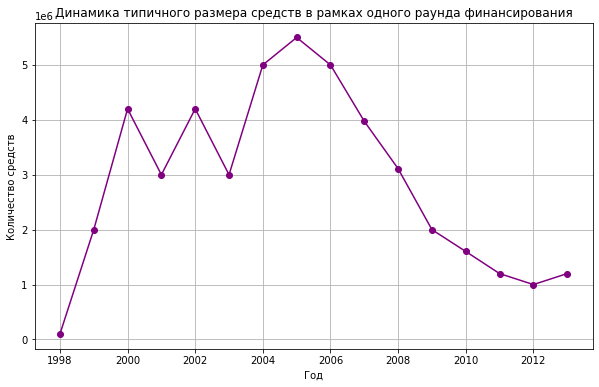

In [33]:
# Строим график
filtered_join_df_copy.reset_index()

filtered_join_df_copy.plot(kind='line',
                      x = 'funded_year',
                      y = 'raised_median_per_one_round',
                      color = 'purple',
                      title = 'Динамика типичного размера средств в рамках одного раунда финансирования',
                      legend = False,
                      figsize=(10,6),
                      xlabel = 'Год',
                      ylabel = 'Количество средств',
                      marker='o'
                    )

plt.grid()

### Промежуточный вывод по раудам финансирования в разрезе лет

График показывает, что **в 2005 году** типичный размер собранных в рамках одного раунда финансирования средств был **максимален**, он составил 5500000 $.

*В 2013 году наблюдались следующие тенденции*:

- Количество раундов: 23978 (высокий показатель, больше только в 2011–2012 гг.).

Размер инвестиций:

Медианный размер раунда составил: 1200000$, что немного выше, чем в 2012 году(1000000)

**Общая тенденция**: с 2005 года — снижение типичного размера средств в рамках одного раунда при росте количества раундов.


### Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

При работе с пропусками было выявлено, что в столбце company_id 84.73% пропусков. Данные пропуски были заменены на значение-индикатор -1. 

В связи с большим количеством пропусков в столбце с информации о компании, в которой работает сотрудник, анализ возможно выполнить только для выборки людей, для которых известно company_id

In [34]:
# удалим строки с сотрудниками, у которых нет информации о компании(-1 - заглушка)
people_df_copy = people_df[people_df['company_id'] >= 0]

count_person_per_company = people_df_copy.groupby('company_id')['person_id'].count().reset_index()
count_person_per_company = count_person_per_company.rename(columns = {'person_id': 'count_person'})
count_person_per_company.head(8)

,company_id,count_person
0,1,2
1,2,1
2,3,3
3,4,13
4,5,61
5,8,3
6,9,1
7,10,2


In [35]:
max_count = count_person_per_company['count_person'].max()
max_count

244

Классическое разделение компаний по количеству персонала:

1. Микропредприятие. Численность работников — до 15 человек
2. Малое предприятие. Количество сотрудников — от 16 до 100 человек
3. Среднее предприятие. Численность персонала — от 101 до 250 человек
4. Крупное предприятие. Количество работников — от 251 человека

В наших данных максимальное количество людей в компании - 244. Следовательно в нашей выборки нет крупных предприятий, что и не удивительно для стартапов. 

В связи с этим разделим компании на 3 категории:

1) small - до 15 человек

2) medium - от 16 до 100 человек

3) large - от 101 человека

In [36]:
# разделяем на категории
bin = [1 , 16, 101]
count_person_per_company['count_person'] = pd.cut(count_person_per_company['count_person'], bins= bin+[float('inf')], labels = ['small', 'medium', 'large'], right=False)
count_person_per_company = count_person_per_company.rename(columns={'count_person': 'category_company'})
count_person_per_company.head(10)

,company_id,category_company
0,1,small
1,2,small
2,3,small
3,4,small
4,5,medium
5,8,small
6,9,small
7,10,small
8,11,small
9,12,medium


In [37]:
# добавляем столбец category_company в people_df_copy

new_people_df = people_df_copy.merge(count_person_per_company, how='inner', on='company_id')
new_people_df

,person_id,first_name,last_name,company_id,network_username,category_company
0,10,Mark,Zuckerberg,5,NaN,medium
1,10430,Ruchi,Sanghvi,5,rsanghvi,medium
2,106199,Adam,Marchick,5,adammarstanford,medium
3,108814,Jimmy,Zhu,5,jyzhu,medium
4,11,Dustin,Moskovitz,5,NaN,medium
...,...,...,...,...,...,...
34609,99990,Tzvi,Milshtein,81971,NaN,small
34610,99992,Romain,Brabant,146815,NaN,small
34611,99997,Peter,Lalonde,83651,peterlalonde,small
34612,174088,Dr. Ray,Woods,188200,network,small


Для анализа количества людей без образования присоединим таблицы education_df и degrees_df. Можно считать, что для сотрудника нет информации об образовании, если у него содержатся пропуски `education_id_x` и `education_id_y`(id образования из датафреймов education_df и degrees_df соответственно). Но эти датафреймы содержат пропуски в информации об образовании, поэтому мы будем считать, что нет информации об образовании сотрудника, если выполняется более сильное улосвие: пропуски находятся в `instituition`(название учебного заведение, в котором  обучался сотрудник) и `degree_type`(тип образования) одновременно. 

In [38]:
join_people_df = new_people_df.merge(education_df, how='left', on='person_id')
join_people_df = join_people_df.merge(degrees_df, how='left', on=['person_id'])
join_people_df.head(15)

,person_id,first_name,last_name,company_id,network_username,category_company,education_id_x,instituition,graduated_at,education_id_y,degree_type,subject
0,10,Mark,Zuckerberg,5,NaN,medium,2415.0,Harvard University,NaT,2415.0,NaN,Computer Science
1,10430,Ruchi,Sanghvi,5,rsanghvi,medium,4247.0,Carnegie Mellon University,NaT,4247.0,BS,Electrical Computer Engineering
2,10430,Ruchi,Sanghvi,5,rsanghvi,medium,4247.0,Carnegie Mellon University,NaT,4248.0,MA,Electrical Computer Engineering
3,10430,Ruchi,Sanghvi,5,rsanghvi,medium,4248.0,Carnegie Mellon University,NaT,4247.0,BS,Electrical Computer Engineering
4,10430,Ruchi,Sanghvi,5,rsanghvi,medium,4248.0,Carnegie Mellon University,NaT,4248.0,MA,Electrical Computer Engineering
5,106199,Adam,Marchick,5,adammarstanford,medium,15666.0,Stanford University,2002-01-01,15666.0,BS,Computer Science
6,108814,Jimmy,Zhu,5,jyzhu,medium,16050.0,Massachusetts Institute of Technology (MIT),NaT,16050.0,S.B.,"Management Science, Math"
7,11,Dustin,Moskovitz,5,NaN,medium,13476.0,Harvard University,NaT,13476.0,No degree,NaN
8,125183,Brandon,Sayles,5,NaN,medium,18382.0,National Institute of Technology Raipur,NaT,18382.0,Computer Engineering (HarDwarE &,All in degree
9,127140,Alison,Rosenthal,5,alisonrosenthal,medium,54926.0,Stanford University Graduate School of Business,NaT,54926.0,MBA,NaN


In [39]:
# Заменим пропуски в столбцах instituition и degree_type на no_information(1 - есть информация; 0 - нет)
join_people_df['instituition'] = join_people_df['instituition'].fillna('no_information')
join_people_df['degree_type'] = join_people_df['degree_type'].fillna('no_information')

def omissions(column):
    if column['instituition'] == 'no_information' and column['degree_type'] == 'no_information':
        return 0
    else:
        return 1

join_people_df['inf_about_education'] = join_people_df.apply(omissions, axis=1)
join_people_df.head(20)

,person_id,first_name,last_name,company_id,network_username,category_company,education_id_x,instituition,graduated_at,education_id_y,degree_type,subject,inf_about_education
0,10,Mark,Zuckerberg,5,NaN,medium,2415.0,Harvard University,NaT,2415.0,no_information,Computer Science,1
1,10430,Ruchi,Sanghvi,5,rsanghvi,medium,4247.0,Carnegie Mellon University,NaT,4247.0,BS,Electrical Computer Engineering,1
2,10430,Ruchi,Sanghvi,5,rsanghvi,medium,4247.0,Carnegie Mellon University,NaT,4248.0,MA,Electrical Computer Engineering,1
3,10430,Ruchi,Sanghvi,5,rsanghvi,medium,4248.0,Carnegie Mellon University,NaT,4247.0,BS,Electrical Computer Engineering,1
4,10430,Ruchi,Sanghvi,5,rsanghvi,medium,4248.0,Carnegie Mellon University,NaT,4248.0,MA,Electrical Computer Engineering,1
5,106199,Adam,Marchick,5,adammarstanford,medium,15666.0,Stanford University,2002-01-01,15666.0,BS,Computer Science,1
6,108814,Jimmy,Zhu,5,jyzhu,medium,16050.0,Massachusetts Institute of Technology (MIT),NaT,16050.0,S.B.,"Management Science, Math",1
7,11,Dustin,Moskovitz,5,NaN,medium,13476.0,Harvard University,NaT,13476.0,No degree,NaN,1
8,125183,Brandon,Sayles,5,NaN,medium,18382.0,National Institute of Technology Raipur,NaT,18382.0,Computer Engineering (HarDwarE &,All in degree,1
9,127140,Alison,Rosenthal,5,alisonrosenthal,medium,54926.0,Stanford University Graduate School of Business,NaT,54926.0,MBA,NaN,1


In [40]:
# выделяю уникальные person_id с информацией и вывожу информацию об их образовании
have_inf = join_people_df.groupby(['category_company', 'person_id'])['inf_about_education'].max().reset_index()
# считаю таких людей
inf_educ_df = have_inf.groupby('category_company')['inf_about_education'].sum().reset_index()
# считаю общее количество людей 
all_count_df = join_people_df.groupby('category_company')['person_id'].nunique().reset_index()
# соединяю в один датафрейм
inf_education_df = inf_educ_df.merge(all_count_df, how='inner', on='category_company')
inf_education_df.columns = ['category_company', 'have_inf', 'all_count']

inf_education_df['havent_inf']  = inf_education_df['all_count'] - inf_education_df['have_inf']
inf_education_df['percent_havent_inf'] = round(inf_education_df['havent_inf'] / inf_education_df['all_count'] * 100,2)

inf_education_df['have_inf'] = inf_education_df['have_inf'].astype('int')
inf_education_df['havent_inf'] = inf_education_df['havent_inf'].astype('int')
inf_education_df

,category_company,have_inf,all_count,havent_inf,percent_havent_inf
0,small,17280,32846,15566,47.39
1,medium,805,1236,431,34.87
2,large,379,531,152,28.63


<Figure size 720x432 with 0 Axes>

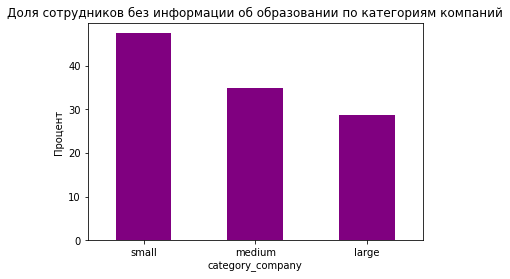

In [41]:
plt.figure(figsize=(10, 6))

inf_education_df.plot(kind = 'bar',
                      x = 'category_company', y = 'percent_havent_inf',
                      color = 'purple',
                      legend = False,
                      rot = 0
                     )
plt.title('Доля сотрудников без информации об образовании по категориям компаний')
plt.ylabel('Процент')

plt.show()

### Промежуточный вывод  о зависимости полноты сведений об образовании сотрудников от размера компаний.

Анализ показал, что наблюдается **четкая тенденция**: чем крупнее компания, тем полнее информация об образовании ее сотрудников:

- Small (1-15 сотрудников): 47.39% сотрудников без данных об образовании
- Medium (16-100): 34.87%
- Large (101+): 28.63%

Это может объясняться:

- Более строгим кадровым учетом в крупных компаниях
- Длительным периодом сбора данных (крупные компании чаще обновляют информацию)
- В маленьких компаниях часто работают самоучки, которые не получали специального образования

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.
- Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

Столбец `network_username` встречается в:

- company_and_rounds_df
- people_df

Необходимо проверить:

1. Являются ли username уникальными для каждого объекта (сотрудника/компании)

2. Есть ли пересечения между username компаний и сотрудников

In [42]:
# доля уникальных значений для сотрудников
unique_people_usernames = people_df['network_username'].nunique()
total_people = len(people_df)
percent_unique_username_people = round(unique_people_usernames / total_people * 100, 2)
percent_unique_username_people

16.95

In [43]:
# доля уникальных значений для компаний
unique_company_usernames = company_and_rounds_df['network_username'].nunique()
total_company = len(company_and_rounds_df)
percent_unique_username_company = round(unique_company_usernames / total_company * 100 , 2)
percent_unique_username_company

36.54

При работе с пропусками было выявлено, что в датафрейме people_df в столбце network_username 84.73% пропусков, а в датафрейме company_and_rounds_df 56.13%. Таким образом на основе полученных значений о доли уникальных значений: 16.95% и 36.54% для people_df и company_and_rounds_df соответственно, можно сделать заключения, что все данные в каждом столбце являются уникальными.

In [44]:
# поиск одинаковый названий в 'network_username' для двух датасетов
common_usernames = set(people_df['network_username'].dropna()) & set(company_and_rounds_df['network_username'].dropna()) #удаляем дубликаты и имещ пересечения двух множеств
common_usernames

{'buzztouchApp',
 'jeffshjarback',
 'zbra',
 'Argura',
 'Vconnecta',
 'rafflecopter',
 'gmailxiaojie',
 'robimbeault',
 'Omnifone',
 'tsheets',
 'transcriptwave',
 'delicatezzaUK',
 'indicareer',
 'steelvaultdata',
 'theseoportal',
 'tefdigital',
 'razhair',
 'fameusUSA',
 'robriggsiii',
 'dandingocpa',
 'smash_haus',
 'zarsmedia',
 'yapp',
 'insightforge',
 'willscullypower',
 'tureus',
 'killermobile',
 'LilitabKiosk',
 'hannaaase',
 'designingstudio',
 'crowdgather',
 'Andolasoft',
 'johnasmcdonald',
 'launchbit',
 'mazecard',
 'nathancarnes',
 'co_simple',
 '21cssindia1',
 'poker',
 'juhani',
 'filmbudget',
 'reputationnews',
 'venforo',
 'MikeFish111',
 'yourprivacy',
 'ctshplc',
 'oggin',
 'Quickercity',
 'roheenaa',
 'SaaSy',
 'liqueoinc',
 'get_a_game',
 'autoclaims',
 'gridgain',
 'InsideAxis',
 'intelen',
 'TranquilDental1',
 'Numerounoweb',
 'perceptionweb',
 'Muzieo',
 'GreggLorenzo_',
 'seocorporation',
 'gocubby',
 'redpointhq',
 'hywelapbuckler',
 'onfx',
 'hirephpcom',


Есть несколько совпадающих значений network_username в двух датасетах

### Промежуточный вывод о возможности объединения датасетов  people_df и company_and_rounds_df по столбцу network_username.

**Проблемы с данными:**

1. В обоих столбцах двух таблиц высокий процент пропусков:

- В people_df: 82.9% пропусков
- В company_and_rounds_df: 56.1% пропусков

2. Возможные конфликты: один username может относиться и к компании, и к сотруднику. Таким образом сотрудник может иметь такой же никнейм, как и официальный аккаунт компании.

**Вывод:** столбец network_username лучше использовать как ключ для JOIN из-за:

- Высокого процента пропусков
- Потенциальных конфликтов между компаниями и людьми
- Отсутствия гарантии уникальности


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [45]:
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [46]:
# сначала проверим данные на дубликаты
company_and_rounds_df.duplicated().sum() # общих дубликатов нет

0

В данной таблице смешаны данные о компаниях и раундах финансирования. Для более удобного анализа разделим их на 2 датафрейма.

In [47]:
# данные о компаниях
company_df = company_and_rounds_df[[
    'company_id', 'name', 'category_code', 'status', 
    'founded_at', 'closed_at', 'domain', 'network_username', 'country_code' 
]]

# удалим строки с пропусками в company_id, так как их невозможно восстановить, а также их содержится малое количество, из-за чего их удаление не повлияет на репрезентативность данных 
company_df.dropna(subset=['company_id'], inplace=True)

# заменим пропуски в category_code, domain, network_username и country_code на значение-индикатор unknown
company_df['category_code'] = company_df['category_code'].fillna('unknown')
company_df['domain'] = company_df['domain'].fillna('unknown')
company_df['network_username'] = company_df['network_username'].fillna('unknown')
company_df['country_code'] = company_df['country_code'].fillna('unknown')

# заменим пропуски в founded_at и closed_at на значение-индикатор 1900-01-01
company_df['founded_at'] = company_df['founded_at'].fillna(pd.Timestamp('1900-01-01'))
company_df['closed_at'] = company_df['closed_at'].fillna(pd.Timestamp('1900-01-01'))

# заменим тип данных в столбце company_id на int64
company_df['company_id'] = company_df['company_id'].astype('int64')

company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   company_id        217472 non-null  int64         
 1   name              217472 non-null  object        
 2   category_code     217472 non-null  object        
 3   status            217472 non-null  object        
 4   founded_at        217472 non-null  datetime64[ns]
 5   closed_at         217472 non-null  datetime64[ns]
 6   domain            217472 non-null  object        
 7   network_username  217472 non-null  object        
 8   country_code      217472 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 16.6+ MB


/tmp/ipykernel_94/1822282489.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df.dropna(subset=['company_id'], inplace=True)
/tmp/ipykernel_94/1822282489.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_df['category_code'] = company_df['category_code'].fillna('unknown')
/tmp/ipykernel_94/1822282489.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [48]:
# данные о финансировании 
funding_df = company_and_rounds_df[[
    'funding_round_id', 'company_id', 'funded_at',
    'funding_round_type', 'raised_amount',
    'pre_money_valuation', 'participants',
    'is_first_round', 'is_last_round'
]]

# удалим все строки для которых нет информации о company_id 
#(такое большое количество непустых данных, в отличие от других столбцов, может быть обусловлено тем, что некоторые компании не получали финсирование)
funding_df.dropna(subset=['funding_round_id'], inplace=True)

# удалим строки, где отсутствует информация об id компании, так как данные строки невозможно будет анализировать в разрезе компаний
funding_df.dropna(subset=['company_id'], inplace=True)

# пропуски в столбце funded_at заменим на значение-индикатор 1900-01-01
funding_df['funded_at'] = funding_df['funded_at'].fillna(pd.Timestamp('1900-01-01'))

# заменим тип данных в столбцах с числовыми типами данных на int64 и оптимизируем тип данных для is_first_round и is_last_round
funding_df['funding_round_id'] = funding_df['funding_round_id'].astype('int64')
funding_df['company_id'] = funding_df['company_id'].astype('int64')
funding_df['raised_amount'] = funding_df['raised_amount'].astype('int64')
funding_df['pre_money_valuation'] = funding_df['pre_money_valuation'].astype('int64')
funding_df['participants'] = funding_df['participants'].astype('int64')
funding_df['is_first_round'] = pd.to_numeric(funding_df['is_first_round'], downcast='integer')
funding_df['is_last_round'] = pd.to_numeric(funding_df['is_last_round'], downcast='integer')

funding_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52626 entries, 0 to 217471
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52626 non-null  int64         
 1   company_id           52626 non-null  int64         
 2   funded_at            52626 non-null  datetime64[ns]
 3   funding_round_type   52626 non-null  object        
 4   raised_amount        52626 non-null  int64         
 5   pre_money_valuation  52626 non-null  int64         
 6   participants         52626 non-null  int64         
 7   is_first_round       52626 non-null  int8          
 8   is_last_round        52626 non-null  int8          
dtypes: datetime64[ns](1), int64(5), int8(2), object(1)
memory usage: 3.3+ MB


/tmp/ipykernel_94/2415927268.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funding_df.dropna(subset=['funding_round_id'], inplace=True)
/tmp/ipykernel_94/2415927268.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funding_df.dropna(subset=['company_id'], inplace=True)
/tmp/ipykernel_94/2415927268.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  funding_df['funded_a

In [49]:
# рассчитаем агрегированные метрики(в разрезе id компаний) для присоединения к company
agg_df_company = company_and_rounds_df.groupby('company_id').agg(
    total_investment_rounds=('investment_rounds', 'sum'), # суммарное количество инвестиционных раундов
    total_funding_rounds=('funding_rounds', 'sum'), # суммарное количество раундов финансирования
    total_milestones=('milestones', 'sum'), # суммарное количество вех финансирования
    total_funding=('funding_total', 'sum'), # итоговая сумма финансирования
).reset_index()
agg_df_company

,company_id,total_investment_rounds,total_funding_rounds,total_milestones,total_funding
0,1.0,0.0,9.0,15.0,1.192500e+08
1,2.0,0.0,0.0,0.0,0.000000e+00
2,3.0,0.0,0.0,5.0,0.000000e+00
3,4.0,0.0,16.0,32.0,1.800000e+08
4,5.0,33.0,121.0,55.0,2.668270e+10
...,...,...,...,...,...
196548,286210.0,0.0,0.0,1.0,0.000000e+00
196549,286211.0,0.0,0.0,0.0,0.000000e+00
196550,286212.0,0.0,0.0,0.0,0.000000e+00
196551,286213.0,0.0,0.0,0.0,0.000000e+00


In [50]:
# рассчитаем агрегированные метрики(в разрезе id компаний) для присоединения к funding_df
agg_df_funding = company_and_rounds_df.groupby('company_id').agg(
    average_raised_amount=('raised_amount', 'mean'), # средняя сумма финансирования
    first_funding_date=('funded_at', 'min'), # начало финансирования
    last_funding_date=('funded_at', 'max') # последняя дата финансирования
).reset_index()
agg_df_funding

,company_id,average_raised_amount,first_funding_date,last_funding_date
0,1.0,1.325000e+07,2005-10-01,2008-05-19
1,2.0,NaN,NaT,NaT
2,3.0,NaN,NaT,NaT
3,4.0,1.125000e+07,2005-10-01,2011-07-12
4,5.0,2.205182e+08,2004-09-01,2011-01-21
...,...,...,...,...
196548,286210.0,NaN,NaT,NaT
196549,286211.0,NaN,NaT,NaT
196550,286212.0,NaN,NaT,NaT
196551,286213.0,NaN,NaT,NaT


In [51]:
company_df = company_df.merge(agg_df_company, how='left', on='company_id')

company_df['total_investment_rounds'] = company_df['total_investment_rounds'].astype('int64')
company_df['total_funding_rounds'] = company_df['total_funding_rounds'].astype('int64')
company_df['total_milestones'] = company_df['total_milestones'].astype('int64')
company_df['total_funding'] = company_df['total_funding'].astype('int64')

company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   company_id               217472 non-null  int64         
 1   name                     217472 non-null  object        
 2   category_code            217472 non-null  object        
 3   status                   217472 non-null  object        
 4   founded_at               217472 non-null  datetime64[ns]
 5   closed_at                217472 non-null  datetime64[ns]
 6   domain                   217472 non-null  object        
 7   network_username         217472 non-null  object        
 8   country_code             217472 non-null  object        
 9   total_investment_rounds  217472 non-null  int64         
 10  total_funding_rounds     217472 non-null  int64         
 11  total_milestones         217472 non-null  int64         
 12  total_funding   

In [52]:
funding_df = funding_df.merge(agg_df_funding, how='left', on='company_id')
# заменим пропуски в рассчитанных столбцах на значение-индикатор
funding_df['first_funding_date'] = funding_df['first_funding_date'].fillna(pd.Timestamp('1900-01-01'))
funding_df['last_funding_date'] = funding_df['last_funding_date'].fillna(pd.Timestamp('1900-01-01'))

funding_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52626 entries, 0 to 52625
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   funding_round_id       52626 non-null  int64         
 1   company_id             52626 non-null  int64         
 2   funded_at              52626 non-null  datetime64[ns]
 3   funding_round_type     52626 non-null  object        
 4   raised_amount          52626 non-null  int64         
 5   pre_money_valuation    52626 non-null  int64         
 6   participants           52626 non-null  int64         
 7   is_first_round         52626 non-null  int8          
 8   is_last_round          52626 non-null  int8          
 9   average_raised_amount  52626 non-null  float64       
 10  first_funding_date     52626 non-null  datetime64[ns]
 11  last_funding_date      52626 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(5), int8(2), object(

### Промежуточный вывод о предобработки датасета company_and_rounds_df

1. Результаты нормализации данных:

Исходный датасет успешно разделен на 2 логические части:

- company_df (217472 строк и 13 столбцов) - статические данные о компаниях
- funding_df (52626 строк и 12 столбцов) - данные о раундах финансирования

2. Ключевые улучшения структуры:

- Устранили дублирование информации (компании больше не повторяются для каждого раунда)
- Сохранили все исходные показатели, добавив расчетные агрегаты:
    - Для компаний: общие суммы и количество раундов
    - Для финансирования: средние значения и временные метки

- Оптимизировали типы данных 

3. Обработка проблемных случаев:

- Пропуски в датах: использованы индикаторы (1900-01-01)
- Категориальные пропуски: заменены на "unknown"


## Шаг 3. Исследовательский анализ объединённых таблиц

> Приступите к шагу 3 после проверки ревьюера.

<big>Студентам нужно чётко сказать - проверять дальше или не проверять.</big>


### Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [53]:
# отбираем компании с нужными данными
new_company_df = company_df[(company_df['total_funding_rounds'] > 0) | (company_df['total_investment_rounds'] > 0) | (company_df['status'] == 'acquired')]

# объединяем датафреймы

result_df = new_company_df.merge(funding_df, how='left', on='company_id')
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142170 entries, 0 to 142169
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   company_id               142170 non-null  int64         
 1   name                     142170 non-null  object        
 2   category_code            142170 non-null  object        
 3   status                   142170 non-null  object        
 4   founded_at               142170 non-null  datetime64[ns]
 5   closed_at                142170 non-null  datetime64[ns]
 6   domain                   142170 non-null  object        
 7   network_username         142170 non-null  object        
 8   country_code             142170 non-null  object        
 9   total_investment_rounds  142170 non-null  int64         
 10  total_funding_rounds     142170 non-null  int64         
 11  total_milestones         142170 non-null  int64         
 12  total_funding   

In [54]:
# количество компаний
result_df['company_id'].nunique()

40747

Проверим сколько заглушек находится в каждом столбце, где они есть

Временные столбцы:

In [55]:
result_df[result_df['first_funding_date'] == '1900-01-01']['company_id'].nunique()

200

In [56]:
result_df[result_df['last_funding_date'] == '1900-01-01']['company_id'].nunique()

200

In [57]:
result_df[result_df['funded_at'] == '1900-01-01']['company_id'].nunique()

238

In [58]:
result_df[result_df['founded_at'] == '1900-01-01']['company_id'].nunique()

12940

Категориальные столбцы:

In [59]:
result_df[result_df['category_code'] == 'unknown']['company_id'].nunique()

5432

In [60]:
result_df[result_df['domain'] == 'unknown']['company_id'].nunique()

4993

In [61]:
result_df[result_df['network_username'] == 'unknown']['company_id'].nunique()

19897

In [62]:
result_df[result_df['country_code'] == 'unknown']['company_id'].nunique()

6005

### Промежуточный вывод об объединенной таблице

В итоговой таблице полсе объединения содержится информация о 40747 компанях. Пропуски были предобработаны до объединения, так что в объединённой таблице их нет.

Заглушки в данных:

- Во временных данных заглушкой является '1900-01-01':

    - `first_funding_date` данные отсутствуют для 200 компаний
    - `last_funding_date` данные отсутствуют для 200 компаний
    - `funded_at` данные отсутствуют для 238 компаний
    - `founded_at` данные отсутствуют для 12940 компаний
    
    
- В категориальных данных установлена заглушка 'unknown':

    - `category_code` данные отсутствуют для 5432 компаний
    - `domain` данные отсутствуют для 4993 компаний
    - `network_username` данные отсутствуют для 19897 компаний
    - `country_code` данные отсутствуют для 6005 компаний
    
Вывод по количеству заглушек в данных:

- Критичные значения заглушек: 

    1.31.76% компаний не имеют даты инвестирования (`founded_at` = '1900-01-01'). Из-за этого сложно анализировать тренды инвестирования с течением времени.
    
    2.`country_code` (14,7%) – невозможность определения географического распределения для части данных.
    
    3.В столбце `category_code` 13,3% заглушек, из-за этого возникнут сложности при отраслевом анализе.
    

- Некритичные значения заглушек: 

    1.Даты финансирования (`first_funding_date`, `last_funding_date` и `funded_at`) – пропуски незначительны (200–238 строк).
    
    2.Столбцы `domain` и `network_username` – важны для веб-аналитики, но не всегда критичны для финансового анализа.


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

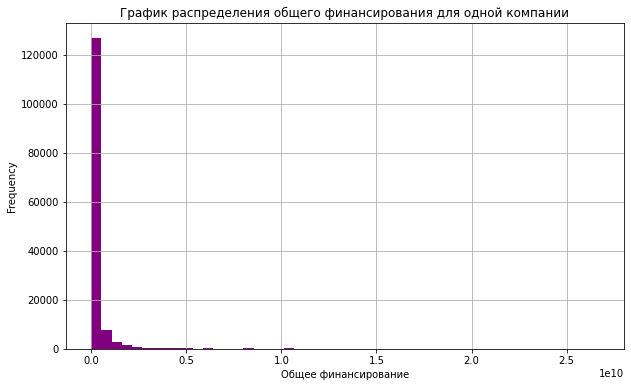

In [63]:
pd.set_option('display.float_format', str) # отключаем научный формат данных

plt.figure(figsize=(10,6))

result_df['total_funding'].plot(kind='hist',
                                color = 'purple',
                                title = 'График распределения общего финансирования для одной компании',
                                bins = 50
                               )
plt.xlabel('Общее финансирование')
plt.grid()

plt.show()

График показывает, что данные показывают сильную асимметрию (правостороннее распределение). Также можно заметить, что данные по были нормализованы, что может указывать на экстримально большие выбросы.

In [64]:
analis_df = result_df['total_funding'].describe()
analis_df

count             142170.0
mean     301524744.2073926
std     1232235470.1310592
min                    0.0
25%              3000000.0
50%             34800000.0
75%            188400000.0
max          26682700000.0
Name: total_funding, dtype: float64

- Среднее значение сильно завышено из-за выбросов (301.5 млн vs медиана 34.8 млн).
- Стандартное отклонение (std) слишком велико (~1.23 млрд), что делает классические доверительные интервалы бессмысленными.

Таким образом, применять к таким данным обычные способы нахождения типичных значений будет оишбкой. Для описания типичных значений будем использовать медиану и квартили.

In [65]:
# посчитаем межквартильный размах
interquartile_range = analis_df['75%'] - analis_df['25%']

# Нижняя граница
lower_bound = analis_df['25%'] - interquartile_range * 1.5
lower_bound 

-275100000.0

Нижняя граница принимает отрицательное значение - не применяем.

In [66]:
# Верхняя граница
upper_bound = analis_df['75%'] + interquartile_range * 1.5
upper_bound 

466500000.0

Верхняя граница составляет 466500000 

### Промежуточный вывод по анализу типичного размера общего финансирования для одной компании

- Типичное финансирование: 3–188 млн (IQR), с медианой 34.8 млн.
- Выбросы: компании с общим финансированием > 466.5 млн (по правилу 1.5×IQR), особенно компании с миллиардным финансированием. Также можно рассмотреть компании с 0 или близким к нулю финансированием, при учёте наличия раундов финансирования.


### Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

In [67]:
# присоединим датафрейм acquisition_df, содержащий данные о покупках компаний

join_result_df = pd.merge(left=result_df, right=acquisition_df, how='inner', left_on='company_id', right_on='acquired_company_id')

# отберем данные о компаниях, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

join_result_df = join_result_df[((join_result_df['price_amount'] == 0) | (join_result_df['price_amount'] == 1)) & (join_result_df['total_funding'] > 0)]
join_result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8279 entries, 7 to 20413
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   company_id               8279 non-null   int64         
 1   name                     8279 non-null   object        
 2   category_code            8279 non-null   object        
 3   status                   8279 non-null   object        
 4   founded_at               8279 non-null   datetime64[ns]
 5   closed_at                8279 non-null   datetime64[ns]
 6   domain                   8279 non-null   object        
 7   network_username         8279 non-null   object        
 8   country_code             8279 non-null   object        
 9   total_investment_rounds  8279 non-null   int64         
 10  total_funding_rounds     8279 non-null   int64         
 11  total_milestones         8279 non-null   int64         
 12  total_funding            8279 non

In [68]:
join_result_df['company_id'].nunique()

1589

Найдено 1589 компаний, которые удовлетворяют условиям

In [69]:
stats = join_result_df['total_funding'].describe()
stats

count               8279.0
mean    227439798.70322502
std     1063518326.0350881
min                 3750.0
25%             11521100.0
50%             52200000.0
75%            165366000.0
max          22800000000.0
Name: total_funding, dtype: float64

Общие характеристики выборки:

- Среднее финансирование : примерно 227 млн долларов — но этот показатель сильно завышен из-за выбросов.
- Медиана (50%): 52.2 млн — более репрезентативный показатель "типичной" компании в выборке.

### Промежуточный вывод об анализе данных, которые были проданы за бесценок

- Типичная компания, проданная за 0/1, получала 11.5–165.4 млн финансирования
- Выбросы (особенно 22.8 млрд) требуют отдельного изучения — вероятно, это особые случаи
- Медиана и IQR: если у проданных за 0/1 финансирование существенно выше, по сравнению с общим распределением, это может указывать на нестандартные сделки.

Многие компании, привлекшие значительные суммы финансирования, > 100 млн., были проданы за символическую сумму(0 или 1).

Возможные причины:

- Технические/юридические сделки.
- Скрытые условия сделки.

В предыдущем щаге были аналитически рассчитаны верхняя и нижняя границы выбросов для столбца funding_total(расчёт производился при помощи межквартильных размахов). Нижняя граница принимает отрицательное значение - не применяем. А верхняя равняется 466.5 млн., определим какой примерно это процентиль.

In [70]:
# найдём верхний процентиль для выбросов
upper_procentile = round(result_df[result_df['total_funding'] <= 466500000]['total_funding'].count() / result_df['total_funding'].count() * 100, 2)
upper_procentile

87.45

### Промежуточный вывод по выбросам для столбца funding_total

**Нижние выбросы**: Нижняя граница принимает отрицательное значение - не применяем

**Верхние границы**:

- По IQR: значения > 466.5 млн(граница - 466.5 млн)

- По перцентилям: 88 процентиль(все значения большие 88 процентиля - выбросы)


### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [71]:
result_df = pd.merge(left=result_df, right=acquisition_df, how='inner', left_on='company_id', right_on='acquired_company_id')

# уберем выбросы в столбце 'price_amount'(значения 0 и 1)
result_df = result_df[(result_df['price_amount'] != 0) & (result_df['price_amount'] != 1)]

# сгруппируем данные по категориям
stats = result_df.groupby('category_code')['price_amount'].agg([
    ('count', 'count'),
    ('median_price', 'median'),
    ('Q1', lambda x: x.quantile(0.25)),
    ('Q3', lambda x: x.quantile(0.75)),
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    ('std', 'std')
]).sort_values('median_price', ascending=False)


In [72]:
stats

,count,median_price,Q1,Q3,IQR,std
category_code,,,,,,
automotive,3,2400000000,1221500000,3800000000,2578500000,2581669292.01502
transportation,11,1100000000,1100000000,1100000000,0,397192419.59259266
sports,2,622500000,441250000,803750000,362500000,512652416.36024696
nanotech,1,584000000,584000000,584000000,0,NaN
ecommerce,119,315000000,12650000,545000000,532350000,264989479.73218253
consulting,95,295000000,137000000,295000000,158000000,587064383.3791108
biotech,636,287500000,60000000,650000000,590000000,1303653488.716644
fashion,6,270000000,213750000,270000000,56250000,70953329.73159188
enterprise,503,255000000,50000000,685000000,635000000,115911157131.82074


In [73]:
# исключим категории с малым числом сделок ( < 15), чтобы избежать случайных выбросов:
stats = stats[stats['count'] >= 15]

# будем считать цену 'типично' выской, если она больше медианного значения по столбце
median_median_price = stats['median_price'].median()
stats = stats[stats['median_price'] > median_median_price]

# проранжируем данные(в качестве меры разброса будем исользовать IQR, так как стандартное отклонение не устойчиво к выбросам, которые присутствуют в нишх данных)
stats['spread_rank'] = stats['IQR'].rank(ascending=False, method='min')
stats = stats.sort_values(by='spread_rank')

stats

,count,median_price,Q1,Q3,IQR,std,spread_rank
category_code,,,,,,,
finance,90,170000000,155000000,1500000000,1345000000,751115643.3537376,1.0
manufacturing,24,247000000,15975000,1220000000,1204025000,1025017729.9351294,2.0
enterprise,503,255000000,50000000,685000000,635000000,115911157131.82074,3.0
biotech,636,287500000,60000000,650000000,590000000,1303653488.716644,4.0
ecommerce,119,315000000,12650000,545000000,532350000,264989479.73218253,5.0
cleantech,216,192500000,30000000,335625000,305625000,444965277.1605727,6.0
security,147,169000000,24000000,300000000,276000000,713364018.1665553,7.0
games_video,307,160000000,30000000,260000000,230000000,810636464.0461818,8.0
consulting,95,295000000,137000000,295000000,158000000,587064383.3791108,9.0


In [74]:
# выделим топ-5 из выборки

top_5_category = stats.head(5)
top_5_category

,count,median_price,Q1,Q3,IQR,std,spread_rank
category_code,,,,,,,
finance,90,170000000,155000000,1500000000,1345000000,751115643.3537376,1.0
manufacturing,24,247000000,15975000,1220000000,1204025000,1025017729.9351294,2.0
enterprise,503,255000000,50000000,685000000,635000000,115911157131.82074,3.0
biotech,636,287500000,60000000,650000000,590000000,1303653488.716644,4.0
ecommerce,119,315000000,12650000,545000000,532350000,264989479.73218253,5.0


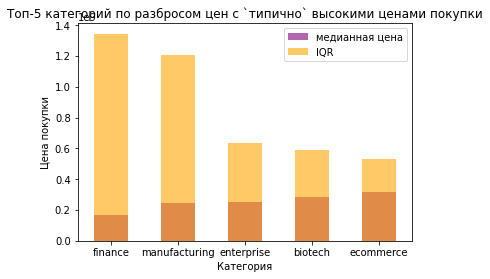

In [75]:
top_5_category['median_price'].plot(kind='bar',
                                    color='purple', 
                                    alpha=0.6, 
                                    label='медианная цена',
                                    rot = 0)

top_5_category['IQR'].plot(kind='bar',
                           color='orange',
                           alpha=0.6,
                           label='IQR',
                           rot = 0)

plt.xlabel('Категория')
plt.ylabel('Цена покупки')
plt.title('Топ-5 категорий по разбросом цен с `типично` высокими ценами покупки')

plt.legend()

plt.show()

### Промежуточный выпод по категориям с высокой ценой продажи и высоким разбросом цен

Логика фильтрации:

- Отбор категорий с медианной ценой выше общей медианы (median_median_price)

- Ранжирование по IQR для выявления категорий с наибольшим разбросом

**Топ-5 категорий** (по убыванию разброса цен):

1. Finance - наибольший разброс (1.345B)при средней цене 170M

2. Manufacturing - высокий разброс (1.204B)и медиана 247M

3. Enterprise - крупнейшая выборка (503 сделки), значительный разброс (635M)

4. Biotech - высокая медиана (287.5M) и большой разброс(590M)

5. Ecommerce - самая высокая медиана (315M) среди топ-5




### Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [76]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   company_id               217472 non-null  int64         
 1   name                     217472 non-null  object        
 2   category_code            217472 non-null  object        
 3   status                   217472 non-null  object        
 4   founded_at               217472 non-null  datetime64[ns]
 5   closed_at                217472 non-null  datetime64[ns]
 6   domain                   217472 non-null  object        
 7   network_username         217472 non-null  object        
 8   country_code             217472 non-null  object        
 9   total_investment_rounds  217472 non-null  int64         
 10  total_funding_rounds     217472 non-null  int64         
 11  total_milestones         217472 non-null  int64         
 12  total_funding   

In [77]:
rounds_df = company_df[company_df['total_funding_rounds'] > 0]  # Исключаем нулевые значения
rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52626 entries, 0 to 217471
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   company_id               52626 non-null  int64         
 1   name                     52626 non-null  object        
 2   category_code            52626 non-null  object        
 3   status                   52626 non-null  object        
 4   founded_at               52626 non-null  datetime64[ns]
 5   closed_at                52626 non-null  datetime64[ns]
 6   domain                   52626 non-null  object        
 7   network_username         52626 non-null  object        
 8   country_code             52626 non-null  object        
 9   total_investment_rounds  52626 non-null  int64         
 10  total_funding_rounds     52626 non-null  int64         
 11  total_milestones         52626 non-null  int64         
 12  total_funding            52626 

In [78]:
# Группировка по статусу
rounds_by_status = rounds_df.groupby('status')['total_funding_rounds'].mean().round().reset_index() # посчитаем среднее значение раундов в разрезе статусов и округлим до целого
rounds_by_status = rounds_by_status.rename(columns={'total_funding_rounds': 'mean_funding_rounds'})
rounds_by_status = rounds_by_status.sort_values('mean_funding_rounds', ascending=False)
rounds_by_status

,status,mean_funding_rounds
2,ipo,30.0
0,acquired,11.0
3,operating,10.0
1,closed,5.0


<Figure size 864x432 with 0 Axes>

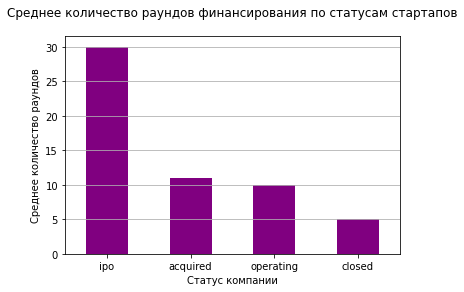

In [79]:
plt.figure(figsize=(12, 6))

rounds_by_status.plot(kind='bar',
                      color = 'purple',
                      legend = False,
                      x = 'status',
                      rot = 0
                      )

# Добавление подписей
plt.title('Среднее количество раундов финансирования по статусам стартапов', pad=20)
plt.xlabel('Статус компании')
plt.ylabel('Среднее количество раундов')

plt.grid(axis = 'y')

plt.show()

### Промежуточный вывод о количестве раундов финансирования в разрезе категорий

1. Наибольшее количество раундов у компаний с статусом:

- ipo (30 в среднем) - компании, вышедшие на IPO, проходят больше раундов, что логично для масштабирования перед публичным размещением

- acquired (11) - приобретенные компании также показывают высокую активность привлечения инвестиций

2. Закрытые стартапы (closed):

- Минимальное количество раундов (5)



## Шаг 4. Итоговый вывод и рекомендации

### **Проделанная работа**

В ходе проекта была проведена комплексная работа с данными о стартапах:

- Загрузку и первичный анализ данных: знакомство с датасетами, проверка структуры, типов данных и пропусков.


- Предобработку данных:

    - Исправление названий столбцов (приведение к snake_case).

    - Обработка пропусков (заполнение индикаторами, удаление некритичных пропусков).

    - Оптимизация типов данных (например, преобразование дат в datetime, целочисленные типы для ID).

    - Разделение датасета company_and_rounds.csv на две логические таблицы: company_df (информация о компаниях) и funding_df (данные о раундах финансирования).
    

- Исследовательский анализ:

    - Анализ динамики финансирования стартапов по годам.

    - Исследование зависимости полноты данных об образовании сотрудников от размера компании.

    - Проверка возможности объединения таблиц по столбцу network_username.

    - Анализ аномальных сделок (покупки за 0 или 1).

    - Изучение категорий стартапов с самыми высокими ценами продажи и наибольшим разбросом цен.

    - Анализ среднего количества раундов финансирования в зависимости от статуса компании.
    
### **Ключевые выводы**

#### Динамика финансирования стартапов:

     Пик медианного размера финансирования раунда пришелся на 2005 год (5.5 млн), после чего наблюдалось снижение при росте количества раундов.

#### Данные об образовании сотрудников:

    Чем крупнее компания, тем полнее информация об образовании сотрудников:

        - Small (1–15 сотрудников): 47.4% без данных об образовании.

        - Medium (16–100): 34.9%.

        - Large (101+): 28.6%.

Это может быть связано с более строгим кадровым учетом в крупных компаниях или особенностями стартапов (например, в малых компаниях чаще работают самоучки).

#### Аномальные сделки (0 или 1):

    Найдено 1589 компаний, проданных за 0 или 1, но при этом привлекших значительное финансирование (медиана — 52.2 млн).

    Возможные причины:

        - Технические/юридические сделки (например, передача активов внутри холдинга).

        - Скрытые условия (например, выплаты через акции или роялти).

#### Категории стартапов с высокой ценой и разбросом цен:

    Топ-5 категорий (по медианной цене и разбросу):
        
        1.Finance: медиана — 170 млн, IQR—1.345млрд.
        2.Manufacturing: медиана — 247 млн, IQR—1.204млрд.
        3.Enterprise: медиана — 255 млн, IQR—635млн.
        4.Biotech: медиана — 287.5 млн, IQR—590млн.
        5.Ecommerce: медиана — 315 млн, IQR—532млн.
        
   Эти категории могут быть особенно интересны для инвесторов, готовых к высоким рискам ради потенциально большой прибыли.
   
#### Количество раундов финансирования:

    Наибольшее среднее количество раундов у компаний:

        IPO: 30 раундов.
        
        acquired: 11 раундов.

    Закрытые стартапы (closed) прошли в среднем 5 раундов, что может указывать на недостаточное финансирование для масштабирования.
    
### Рекомендации для заказчика

Для инвестиций в высокорисковые и высокодоходные стартапы:

- Сфокусироваться на категориях Finance, Biotech и Enterprise — они демонстрируют высокие медианные цены и значительный разброс, что может указывать на потенциал для "крупных выигрышей".

- Учитывать, что в этих категориях возможны как сверхприбыльные сделки, так и провалы (из-за большого IQR).

При анализе сделок за 0/1:

- Изучить дополнительные юридические и финансовые условия таких сделок — формальная цена может не отражать реальную стоимость.

- Проверить, не связаны ли эти сделки с изменением структуры компаний.

Для оценки перспективности стартапов:

- Компании, прошедшие более 10 раундов финансирования, с высокой вероятностью либо выйдут на IPO, либо будут приобретены.

- Стартапы с меньше 5 раундов имеют повышенный риск закрытия.